In [1]:
%pip install --upgrade openai
%pip install --upgrade tqdm

%pip install --upgrade python-igraph leidenalg

   ---------------------------------------- 0.0/328.5 kB ? eta -:--:--
   --- ------------------------------------ 30.7/328.5 kB 1.4 MB/s eta 0:00:01
   --------- ------------------------------ 81.9/328.5 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 143.4/328.5 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 317.4/328.5 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 328.5/328.5 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.35.13
    Uninstalling openai-1.35.13:
      Successfully uninstalled openai-1.35.13
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from openai import OpenAI
from tqdm import tqdm

from src.helper_func.graph_util import *
from src.helper_func.project_util import *

from collections import Counter
import time

import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms, viz, evaluation, ensemble

In [4]:
config = read_ini_file('../config.ini')
project_name = config['project']['name']
project_desc = config['project']['desc']
(project_name,project_desc)

('k9mail-v5.304', 'K-9 Mail is an open-source email client for Android.')

In [5]:
ifile = f'../../test/2-architecture-layering-output/k-9-5.304-output.json'
graph = read_json_file(ifile)
nodes,edges = transform_graph(graph)

len(nodes), nodes

(16730,
 {'com.fsck.k9.mail.Part.addHeader(java.lang.String,java.lang.String)': {'id': 'com.fsck.k9.mail.Part.addHeader(java.lang.String,java.lang.String)',
   'properties': {'visibility': 'public',
    'simpleName': 'addHeader(java.lang.String,java.lang.String)',
    'qualifiedName': 'com.fsck.k9.mail.Part.addHeader(java.lang.String,java.lang.String)',
    'kind': 'method',
    'sourceText': 'void addHeader(java.lang.String name, java.lang.String value);',
    'docComment': '',
    'metaSrc': 'source code',
    'description': 'Adds a header with the specified name and value to the email part.',
    'returns': {'type': 'void',
     'description': 'This method does not return any value.'},
    'reason': 'Provided to allow setting custom headers for email parts.',
    'howToUse': 'Call addHeader method on an instance of a class that implements the Part interface, providing the name and value of the header to be added.',
    'howItWorks': 'When called, this method adds a new header entry 

In [6]:
# Flatten the list of labels and count each label
label_counts = Counter(label for node in nodes.values() for label in node['labels'])

total_nodes = 0

# Print the count of each label
for label, count in label_counts.items():
    total_nodes += count
    print(f"{label}: {count}")
	
print(f"All labels: {total_nodes}")

Operation: 5135
Variable: 9946
Constructor: 788
Structure: 783
Script: 15
Container: 55
Primitive: 8
All labels: 16730


In [7]:
p_layer_nodes = [node_id for node_id, node_data in nodes.items() if node_data['properties'].get('layer') == 'Presentation Layer']

len(p_layer_nodes), p_layer_nodes

(1821,
 ['com.fsck.k9.ui.messageview.MessageViewFragment.displayMessageSubject(java.lang.String)',
  'com.fsck.k9.fragment.MessageListFragment.decodeArguments()',
  'com.fsck.k9.activity.ActivityListener.synchronizeMailboxHeadersStarted(com.fsck.k9.Account,java.lang.String)',
  'com.fsck.k9.activity.compose.RecipientPresenter.onClickCcLabel()',
  'com.fsck.k9.ui.compose.QuotedMessageMvpView.setMessageContentCharacters(java.lang.String)',
  'com.fsck.k9.helper.Utility.wrap(java.lang.String,int,java.lang.String,boolean)',
  'com.fsck.k9.activity.Accounts.showAccountsImportedDialog(com.fsck.k9.preferences.SettingsImporter$ImportResults,java.lang.String)',
  'com.fsck.k9.activity.K9ListActivity.onCreate(android.os.Bundle)',
  'com.fsck.k9.activity.MessageCompose.onProgressCancel(com.fsck.k9.fragment.AttachmentDownloadDialogFragment)',
  'com.fsck.k9.activity.Accounts.onExport(boolean,com.fsck.k9.Account)',
  'com.fsck.k9.activity.NotificationDeleteConfirmation.onCreate(android.os.Bundle)',

In [8]:
len(edges), edges

(10,
 {'returnType': [{'id': '3d69e43082a6e726f2c8e5efd52dedf0',
    'source': 'com.fsck.k9.mailstore.LocalFolder.getMessageUidById(long)',
    'label': 'returnType',
    'properties': {'weight': 1, 'kind': 'type', 'metaSrc': 'source code'},
    'target': 'java.lang.String'},
   {'id': 'ce99d4139ad3bae4d4445bb561b4de90',
    'source': 'com.fsck.k9.mail.store.imap.ImapFolderPusher$IdleStopper()',
    'label': 'returnType',
    'properties': {'weight': 1, 'kind': 'type', 'metaSrc': 'source code'},
    'target': 'com.fsck.k9.mail.store.imap.ImapFolderPusher$IdleStopper'},
   {'id': 'e37124e2e4b751feb357a4fd5608ca8d',
    'source': 'com.fsck.k9.mail.internet.DecoderUtil.decodeEncodedWords(java.lang.String,com.fsck.k9.mail.Message)',
    'label': 'returnType',
    'properties': {'weight': 1, 'kind': 'type', 'metaSrc': 'source code'},
    'target': 'java.lang.String'},
   {'id': '24fbaa02a7d234eed05da2dea7e50ec2',
    'source': 'com.fsck.k9.preferences.SettingsImporter$ImportedIdentity()',
 

In [9]:
total_edges = 0

# Count and print the count of each label
for key in edges.keys():
	total_edges += len(edges[key])
	print(f"{key}: {len(edges[key])}")
	
print(f"All labels: {total_edges}")

returnType: 2947
invokes: 8691
hasParameter: 6330
type: 7615
hasScript: 5938
hasVariable: 3616
instantiates: 873
nests: 310
contains: 836
specializes: 230
All labels: 37386


In [10]:
edges_list = []

edges_list += edges['contains'] + edges['hasScript'] + edges['invokes']

len(edges_list), edges_list

(15465,
 [{'id': '205549359078d0bdd1b8c38ad76aa98d',
   'source': 'com.fsck.k9',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.message'},
  {'id': 'f395990e1360086b2a3bd12464f5e53c',
   'source': 'com.fsck.k9.mail',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.mail.filter'},
  {'id': 'd3c405e6527dfaa75148a4b5c936dc5b',
   'source': 'com.fsck.k9.helper',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.helper.jsoup'},
  {'id': 'fa0327f2187fb8fc7e5b5b3095b13d76',
   'source': 'com.fsck.k9.provider',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.provider.UnreadWidgetProvider'},
  {'id': '226e1a2a371736b4d61e023529354022',
   'source': 'com.fsck.k9.fragment',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'targ

In [11]:
p_layer_edges = extract_edges(edges_list, p_layer_nodes)

len(p_layer_edges), p_layer_edges

(2788,
 [{'id': '226e1a2a371736b4d61e023529354022',
   'source': 'com.fsck.k9.fragment',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.fragment.MessageListFragmentComparators$AttachmentComparator'},
  {'id': 'c29d749418fde4560010a23a9a360668',
   'source': 'com.fsck.k9.fragment',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.fragment.MessageListFragment$MessageListActivityListener'},
  {'id': '4206d34e678696520d539790102429fb',
   'source': 'com.fsck.k9.view',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.view.ThemeUtils'},
  {'id': '01a49639b5abc37a337a9ca462b4ce99',
   'source': 'com.fsck.k9.activity',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.activity.ActivityListener'},
  {'id': '3490e44b5b1d03d3e88439dc8beda925',
   'source': 'com.fs

In [12]:
p_layer_edges_invokes = [edge for edge in p_layer_edges if edge['label']=='invokes']

len(p_layer_edges_invokes), p_layer_edges_invokes

(1439,
 [{'id': 'b0e8810ffecdbf049699b7152cb8bb9a',
   'source': 'com.fsck.k9.view.MessageHeader.onLongClick(android.view.View)',
   'label': 'invokes',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.view.MessageHeader.onAddAddressesToClipboard(com.fsck.k9.mail.Address[])'},
  {'id': 'da5185df864b79b7836a30472000aa29',
   'source': 'com.fsck.k9.notification.DeviceNotifications.createBigTextStyleSummaryNotification(com.fsck.k9.Account,com.fsck.k9.notification.NotificationHolder)',
   'label': 'invokes',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'com.fsck.k9.notification.DeviceNotifications.addReplyAction(android.support.v4.app.NotificationCompat.Builder,com.fsck.k9.notification.NotificationContent,int)'},
  {'id': '368e5ffe6d47d02f4166166c720f87aa',
   'source': 'com.fsck.k9.ui.messageview.MessageContainerView.disableAttachmentButtons()',
   'label': 'invokes',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   

In [13]:
lifting_edges = lift(edges['hasScript'], p_layer_edges_invokes)

len(lifting_edges), lifting_edges

(299,
 [{'source': 'com.fsck.k9.activity.compose.MessageActions',
   'target': 'com.fsck.k9.activity.compose.MessageActions',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'com.fsck.k9.activity.setup.AuthTypeHolder',
   'target': 'com.fsck.k9.activity.setup.AuthTypeHolder',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'com.fsck.k9.ui.compose.QuotedMessageMvpView',
   'target': 'com.fsck.k9.view.MessageWebView',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'com.fsck.k9.ui.messageview.MessageTopView',
   'target': 'com.fsck.k9.ui.messageview.MessageTopView',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 9}},
  {'source': 'com.fsck.k9.activity.FolderList$FolderListAdapter',
   'target': 'com.fsck.k9.Account',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 2}},
  {'source': 'com.fsck.k9.fragme

In [14]:
lifting_edges = [edge for edge in lifting_edges if edge['source']!=edge['target']]

len(lifting_edges), lifting_edges

(212,
 [{'source': 'com.fsck.k9.ui.compose.QuotedMessageMvpView',
   'target': 'com.fsck.k9.view.MessageWebView',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'com.fsck.k9.activity.FolderList$FolderListAdapter',
   'target': 'com.fsck.k9.Account',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 2}},
  {'source': 'com.fsck.k9.fragment.AttachmentDownloadDialogFragment',
   'target': 'com.fsck.k9.fragment.AttachmentDownloadDialogFragment$AttachmentDownloadCancelListener',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'com.fsck.k9.ui.messageview.MessageTopView',
   'target': 'com.fsck.k9.view.ToolableViewAnimator',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 4}},
  {'source': 'com.fsck.k9.notification.BaseNotifications',
   'target': 'com.fsck.k9.notification.NotificationActionCreator',
   'label': 'hasScript-invokes-inv_hasScript',
   'pr

In [15]:
weighted_edges_list = [(edge['source'], edge['target'], edge['properties']['weight']) for edge in lifting_edges]

len(weighted_edges_list), weighted_edges_list

(212,
 [('com.fsck.k9.ui.compose.QuotedMessageMvpView',
   'com.fsck.k9.view.MessageWebView',
   1),
  ('com.fsck.k9.activity.FolderList$FolderListAdapter',
   'com.fsck.k9.Account',
   2),
  ('com.fsck.k9.fragment.AttachmentDownloadDialogFragment',
   'com.fsck.k9.fragment.AttachmentDownloadDialogFragment$AttachmentDownloadCancelListener',
   1),
  ('com.fsck.k9.ui.messageview.MessageTopView',
   'com.fsck.k9.view.ToolableViewAnimator',
   4),
  ('com.fsck.k9.notification.BaseNotifications',
   'com.fsck.k9.notification.NotificationActionCreator',
   1),
  ('com.fsck.k9.ui.messageview.MessageContainerView',
   'com.fsck.k9.view.MessageWebView',
   6),
  ('com.fsck.k9.ui.messageview.AttachmentController$SaveAttachmentAsyncTask',
   'com.fsck.k9.ui.messageview.MessageViewFragment',
   2),
  ('com.fsck.k9.activity.MessageList',
   'com.fsck.k9.fragment.MessageListFragment',
   9),
  ('com.fsck.k9.ui.messageview.MessageViewFragment',
   'com.fsck.k9.ui.messageview.MessageCryptoPresenter',

In [16]:
# Create a new graph
G_w = nx.Graph()

# Add weighted edges to the graph
G_w.add_weighted_edges_from(weighted_edges_list)

# Find connected components
connected_components_w = [G_w.subgraph(c).copy() for c in nx.connected_components(G_w)]

# Now, connected_components is a list of sets, where each set is a connected component (i.e., a sublist of nodes that are connected to each other)
len(connected_components_w), connected_components_w

(9,
  <networkx.classes.graph.Graph at 0x23e745869d0>])

In [18]:
# Sort components by greater size
sorted_list_ccw = []

for component in connected_components_w:
    sorted_list_ccw.append(list(component))
    sorted_list_ccw = sorted(sorted_list_ccw, key=len, reverse=True)
	
for i, component in enumerate(sorted_list_ccw):
	print(f"Feature {i+1}: {len(component)}")
    
sorted_list_ccw

Feature 1: 141
Feature 2: 4
Feature 3: 2
Feature 4: 2
Feature 5: 2
Feature 6: 2
Feature 7: 2
Feature 8: 2
Feature 9: 2


[['com.fsck.k9.ui.compose.QuotedMessageMvpView',
  'com.fsck.k9.view.MessageWebView',
  'com.fsck.k9.activity.FolderList$FolderListAdapter',
  'com.fsck.k9.Account',
  'com.fsck.k9.ui.messageview.MessageTopView',
  'com.fsck.k9.view.ToolableViewAnimator',
  'com.fsck.k9.notification.BaseNotifications',
  'com.fsck.k9.notification.NotificationActionCreator',
  'com.fsck.k9.ui.messageview.MessageContainerView',
  'com.fsck.k9.ui.messageview.AttachmentController$SaveAttachmentAsyncTask',
  'com.fsck.k9.ui.messageview.MessageViewFragment',
  'com.fsck.k9.activity.MessageList',
  'com.fsck.k9.fragment.MessageListFragment',
  'com.fsck.k9.ui.messageview.MessageCryptoPresenter',
  'com.fsck.k9.notification.SyncNotifications',
  'com.fsck.k9.activity.setup.AccountSetupNames',
  'com.fsck.k9.activity.Accounts',
  'com.fsck.k9.activity.setup.AccountSetupBasics',
  'com.fsck.k9.activity.K9Activity',
  'com.fsck.k9.activity.Accounts$AccountsImportedDialog',
  'com.fsck.k9.activity.Accounts$SimpleD

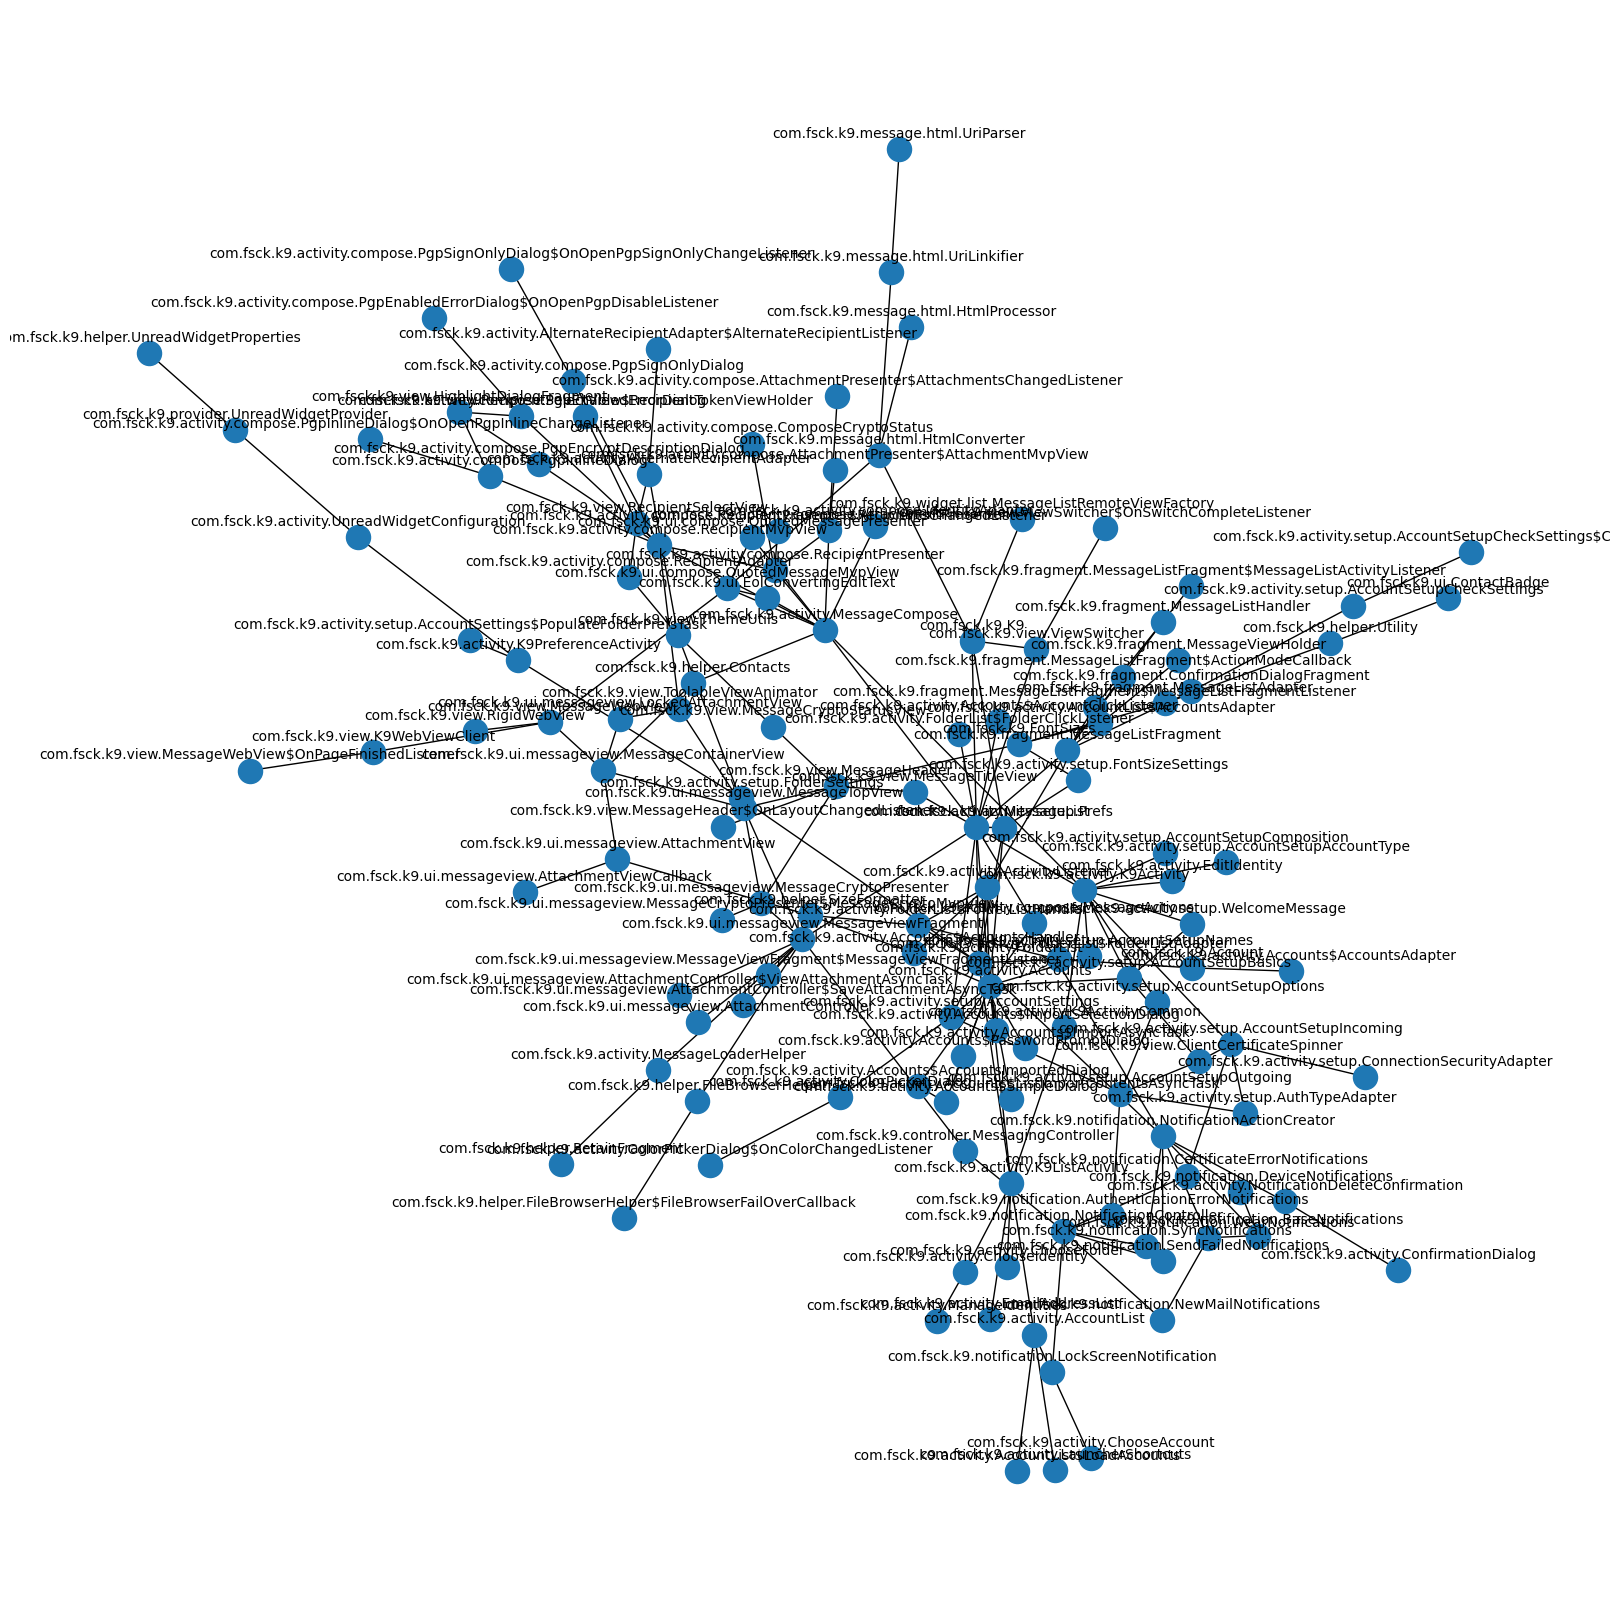

In [19]:
# Get the positions of the nodes
pos = nx.spring_layout(connected_components_w[0])

# Create a new dictionary for label positions
label_pos = {node: (x, y+0.02) for node, (x, y) in pos.items()}
plt.figure(figsize=(16, 16))
# Draw the subgraph
nx.draw(connected_components_w[0], pos, with_labels=False)
nx.draw_networkx_labels(connected_components_w[0], label_pos, font_size=10)

# Display the graph
plt.show()

In [20]:
print(connected_components_w[0].nodes)

['com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.view.MessageWebView', 'com.fsck.k9.activity.FolderList$FolderListAdapter', 'com.fsck.k9.Account', 'com.fsck.k9.ui.messageview.MessageTopView', 'com.fsck.k9.view.ToolableViewAnimator', 'com.fsck.k9.notification.BaseNotifications', 'com.fsck.k9.notification.NotificationActionCreator', 'com.fsck.k9.ui.messageview.MessageContainerView', 'com.fsck.k9.ui.messageview.AttachmentController$SaveAttachmentAsyncTask', 'com.fsck.k9.ui.messageview.MessageViewFragment', 'com.fsck.k9.activity.MessageList', 'com.fsck.k9.fragment.MessageListFragment', 'com.fsck.k9.ui.messageview.MessageCryptoPresenter', 'com.fsck.k9.notification.SyncNotifications', 'com.fsck.k9.activity.setup.AccountSetupNames', 'com.fsck.k9.activity.Accounts', 'com.fsck.k9.activity.setup.AccountSetupBasics', 'com.fsck.k9.activity.K9Activity', 'com.fsck.k9.activity.Accounts$AccountsImportedDialog', 'com.fsck.k9.activity.Accounts$SimpleDialog', 'com.fsck.k9.activity.UnreadWidge

In [21]:
print(connected_components_w[0].edges(data=True))

[('com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.view.MessageWebView', {'weight': 1}), ('com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.ui.compose.QuotedMessagePresenter', {'weight': 1}), ('com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.ui.EolConvertingEditText', {'weight': 3}), ('com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.activity.MessageCompose', {'weight': 1}), ('com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.message.html.HtmlConverter', {'weight': 1}), ('com.fsck.k9.view.MessageWebView', 'com.fsck.k9.ui.messageview.MessageContainerView', {'weight': 6}), ('com.fsck.k9.view.MessageWebView', 'com.fsck.k9.view.RigidWebView', {'weight': 3}), ('com.fsck.k9.view.MessageWebView', 'com.fsck.k9.view.K9WebViewClient', {'weight': 1}), ('com.fsck.k9.activity.FolderList$FolderListAdapter', 'com.fsck.k9.Account', {'weight': 2}), ('com.fsck.k9.activity.FolderList$FolderListAdapter', 'com.fsck.k9.activity.FolderList$FolderListHandler'

In [22]:
leiden_coms_w = algorithms.leiden(connected_components_w[0].copy(), weights='weight')

leiden_coms_w.to_json()

'{"communities": [["com.fsck.k9.activity.FolderList$FolderListAdapter", "com.fsck.k9.Account", "com.fsck.k9.activity.Accounts", "com.fsck.k9.activity.Accounts$AccountsImportedDialog", "com.fsck.k9.activity.Accounts$SimpleDialog", "com.fsck.k9.activity.Accounts$ListImportContentsAsyncTask", "com.fsck.k9.activity.ActivityListener", "com.fsck.k9.activity.FolderList", "com.fsck.k9.activity.FolderList$FolderListHandler", "com.fsck.k9.helper.SizeFormatter", "com.fsck.k9.activity.ColorPickerDialog", "com.fsck.k9.activity.ColorPickerDialog$OnColorChangedListener", "com.fsck.k9.activity.Accounts$PasswordPromptDialog", "com.fsck.k9.activity.Accounts$AccountsHandler", "com.fsck.k9.activity.Accounts$ImportSelectionDialog", "com.fsck.k9.activity.setup.AccountSettings", "com.fsck.k9.activity.setup.Prefs", "com.fsck.k9.activity.Accounts$ImportAsyncTask", "com.fsck.k9.activity.Accounts$AccountsAdapter"], ["com.fsck.k9.ui.messageview.MessageTopView", "com.fsck.k9.view.ToolableViewAnimator", "com.fsck.k

In [23]:
leiden_coms_w.average_internal_degree()

FitnessResult(min=1.0, max=2.736842105263158, score=2.0190099274077604, std=0.4512305391722809)

In [24]:
len(leiden_coms_w.communities), leiden_coms_w.communities

(12,
 [['com.fsck.k9.activity.FolderList$FolderListAdapter',
   'com.fsck.k9.Account',
   'com.fsck.k9.activity.Accounts',
   'com.fsck.k9.activity.Accounts$AccountsImportedDialog',
   'com.fsck.k9.activity.Accounts$SimpleDialog',
   'com.fsck.k9.activity.Accounts$ListImportContentsAsyncTask',
   'com.fsck.k9.activity.ActivityListener',
   'com.fsck.k9.activity.FolderList',
   'com.fsck.k9.activity.FolderList$FolderListHandler',
   'com.fsck.k9.helper.SizeFormatter',
   'com.fsck.k9.activity.ColorPickerDialog',
   'com.fsck.k9.activity.ColorPickerDialog$OnColorChangedListener',
   'com.fsck.k9.activity.Accounts$PasswordPromptDialog',
   'com.fsck.k9.activity.Accounts$AccountsHandler',
   'com.fsck.k9.activity.Accounts$ImportSelectionDialog',
   'com.fsck.k9.activity.setup.AccountSettings',
   'com.fsck.k9.activity.setup.Prefs',
   'com.fsck.k9.activity.Accounts$ImportAsyncTask',
   'com.fsck.k9.activity.Accounts$AccountsAdapter'],
  ['com.fsck.k9.ui.messageview.MessageTopView',
   'com

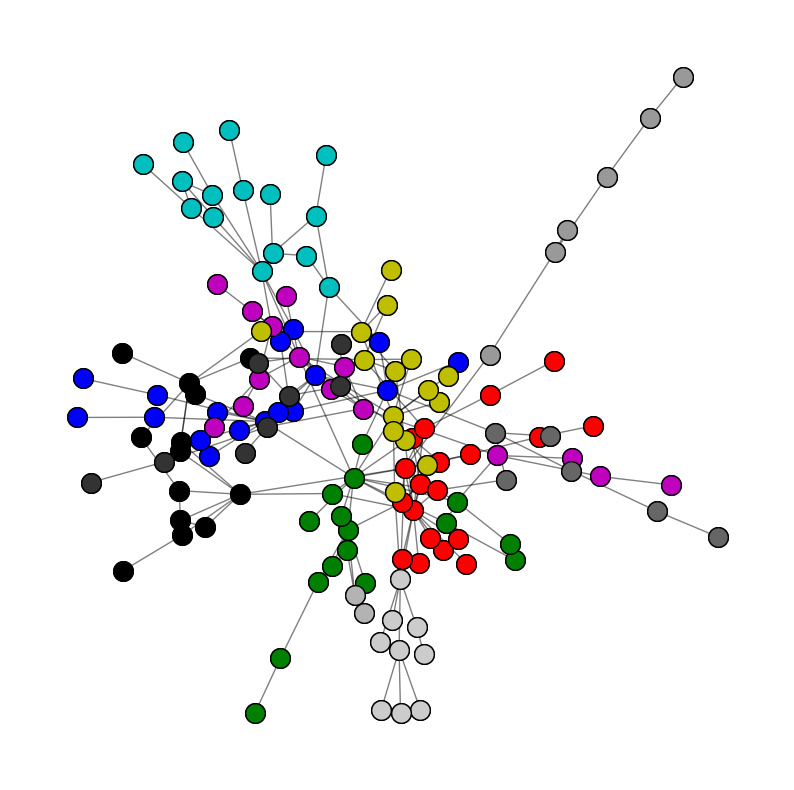

In [25]:
pos = nx.spring_layout(connected_components_w[0])
viz.plot_network_clusters(connected_components_w[0], leiden_coms_w, pos, figsize=(10, 10))

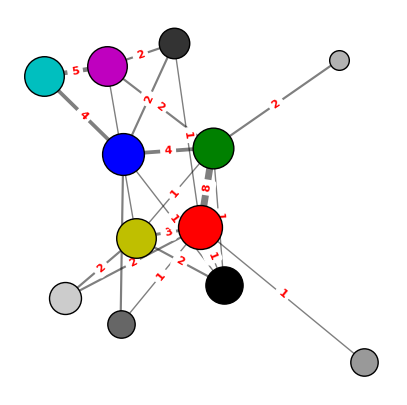

In [26]:
viz.plot_community_graph(connected_components_w[0], leiden_coms_w, figsize=(5, 5))

In [31]:
connected_components_w[0].nodes

NodeView(('com.fsck.k9.ui.compose.QuotedMessageMvpView', 'com.fsck.k9.view.MessageWebView', 'com.fsck.k9.activity.FolderList$FolderListAdapter', 'com.fsck.k9.Account', 'com.fsck.k9.ui.messageview.MessageTopView', 'com.fsck.k9.view.ToolableViewAnimator', 'com.fsck.k9.notification.BaseNotifications', 'com.fsck.k9.notification.NotificationActionCreator', 'com.fsck.k9.ui.messageview.MessageContainerView', 'com.fsck.k9.ui.messageview.AttachmentController$SaveAttachmentAsyncTask', 'com.fsck.k9.ui.messageview.MessageViewFragment', 'com.fsck.k9.activity.MessageList', 'com.fsck.k9.fragment.MessageListFragment', 'com.fsck.k9.ui.messageview.MessageCryptoPresenter', 'com.fsck.k9.notification.SyncNotifications', 'com.fsck.k9.activity.setup.AccountSetupNames', 'com.fsck.k9.activity.Accounts', 'com.fsck.k9.activity.setup.AccountSetupBasics', 'com.fsck.k9.activity.K9Activity', 'com.fsck.k9.activity.Accounts$AccountsImportedDialog', 'com.fsck.k9.activity.Accounts$SimpleDialog', 'com.fsck.k9.activity.Un

In [32]:
len(connected_components_w[0].nodes)

153

In [33]:
cw_nodes_list = list(connected_components_w[0].nodes)

cw_nodes_list = cw_nodes_list[:141]

cw_nodes_list

['com.fsck.k9.ui.compose.QuotedMessageMvpView',
 'com.fsck.k9.view.MessageWebView',
 'com.fsck.k9.activity.FolderList$FolderListAdapter',
 'com.fsck.k9.Account',
 'com.fsck.k9.ui.messageview.MessageTopView',
 'com.fsck.k9.view.ToolableViewAnimator',
 'com.fsck.k9.notification.BaseNotifications',
 'com.fsck.k9.notification.NotificationActionCreator',
 'com.fsck.k9.ui.messageview.MessageContainerView',
 'com.fsck.k9.ui.messageview.AttachmentController$SaveAttachmentAsyncTask',
 'com.fsck.k9.ui.messageview.MessageViewFragment',
 'com.fsck.k9.activity.MessageList',
 'com.fsck.k9.fragment.MessageListFragment',
 'com.fsck.k9.ui.messageview.MessageCryptoPresenter',
 'com.fsck.k9.notification.SyncNotifications',
 'com.fsck.k9.activity.setup.AccountSetupNames',
 'com.fsck.k9.activity.Accounts',
 'com.fsck.k9.activity.setup.AccountSetupBasics',
 'com.fsck.k9.activity.K9Activity',
 'com.fsck.k9.activity.Accounts$AccountsImportedDialog',
 'com.fsck.k9.activity.Accounts$SimpleDialog',
 'com.fsck.k9

In [34]:
features_leiden_coms_w = leiden_coms_w.communities

print(len(features_leiden_coms_w))

print(len(features_leiden_coms_w[0]), features_leiden_coms_w[0])

print(features_leiden_coms_w[0][0])

12
19 ['com.fsck.k9.activity.FolderList$FolderListAdapter', 'com.fsck.k9.Account', 'com.fsck.k9.activity.Accounts', 'com.fsck.k9.activity.Accounts$AccountsImportedDialog', 'com.fsck.k9.activity.Accounts$SimpleDialog', 'com.fsck.k9.activity.Accounts$ListImportContentsAsyncTask', 'com.fsck.k9.activity.ActivityListener', 'com.fsck.k9.activity.FolderList', 'com.fsck.k9.activity.FolderList$FolderListHandler', 'com.fsck.k9.helper.SizeFormatter', 'com.fsck.k9.activity.ColorPickerDialog', 'com.fsck.k9.activity.ColorPickerDialog$OnColorChangedListener', 'com.fsck.k9.activity.Accounts$PasswordPromptDialog', 'com.fsck.k9.activity.Accounts$AccountsHandler', 'com.fsck.k9.activity.Accounts$ImportSelectionDialog', 'com.fsck.k9.activity.setup.AccountSettings', 'com.fsck.k9.activity.setup.Prefs', 'com.fsck.k9.activity.Accounts$ImportAsyncTask', 'com.fsck.k9.activity.Accounts$AccountsAdapter']
com.fsck.k9.activity.FolderList$FolderListAdapter


In [35]:
dict_features_leiden_coms_w = dict()

for i in range(len(features_leiden_coms_w)):
   dict_features_leiden_coms_w['feature_'+str(i+1)] = [features_leiden_coms_w[i][j] for j in range(len(features_leiden_coms_w[i]))]
   
len(dict_features_leiden_coms_w), dict_features_leiden_coms_w

(12,
 {'feature_1': ['com.fsck.k9.activity.FolderList$FolderListAdapter',
   'com.fsck.k9.Account',
   'com.fsck.k9.activity.Accounts',
   'com.fsck.k9.activity.Accounts$AccountsImportedDialog',
   'com.fsck.k9.activity.Accounts$SimpleDialog',
   'com.fsck.k9.activity.Accounts$ListImportContentsAsyncTask',
   'com.fsck.k9.activity.ActivityListener',
   'com.fsck.k9.activity.FolderList',
   'com.fsck.k9.activity.FolderList$FolderListHandler',
   'com.fsck.k9.helper.SizeFormatter',
   'com.fsck.k9.activity.ColorPickerDialog',
   'com.fsck.k9.activity.ColorPickerDialog$OnColorChangedListener',
   'com.fsck.k9.activity.Accounts$PasswordPromptDialog',
   'com.fsck.k9.activity.Accounts$AccountsHandler',
   'com.fsck.k9.activity.Accounts$ImportSelectionDialog',
   'com.fsck.k9.activity.setup.AccountSettings',
   'com.fsck.k9.activity.setup.Prefs',
   'com.fsck.k9.activity.Accounts$ImportAsyncTask',
   'com.fsck.k9.activity.Accounts$AccountsAdapter'],
  'feature_2': ['com.fsck.k9.ui.messagevie

In [42]:
nodes[features_leiden_coms_w[0][1]]

{'id': 'com.fsck.k9.Account',
 'properties': {'docComment': 'Account stores all of the settings for a single account defined by the user. It is able to save\r\nand delete itself given a Preferences to work with. Each account is defined by a UUID.\r\n',
  'simpleName': 'Account',
  'qualifiedName': 'com.fsck.k9.Account',
  'kind': 'class',
  'metaSrc': 'source code',
  'dependencyProfile': 'transit'},
 'labels': ['Structure']}

In [44]:
for i in range(len(features_leiden_coms_w)):
    for j in range(len(features_leiden_coms_w[i])):
        dict_features_leiden_coms_w['feature_'+str(i+1)][j] += ': {}'.format(nodes[features_leiden_coms_w[i][j]]['properties'].get('description', nodes[features_leiden_coms_w[i][j]]['properties'].get('docComment', features_leiden_coms_w[i][j])))
   
len(dict_features_leiden_coms_w), dict_features_leiden_coms_w

(12,
 {'feature_1': ['com.fsck.k9.activity.FolderList$FolderListAdapter: Manages the folder list display and interaction logic.: Manages the folder list display and interaction logic.: : Manages the folder list display and interaction logic.',
   'com.fsck.k9.Account: Account stores all of the settings for a single account defined by the user. It is able to save\r\nand delete itself given a Preferences to work with. Each account is defined by a UUID.\r\n',
   'com.fsck.k9.activity.Accounts: Manages the user interface, handles user interactions, and displays information for the Accounts activity in the Android email client app.',
   'com.fsck.k9.activity.Accounts$AccountsImportedDialog: Manages the display of import results and handles actions after importing accounts in the Android email client app.',
   'com.fsck.k9.activity.Accounts$SimpleDialog: Handles the presentation of dialogs and user interactions within the Android email client app.',
   'com.fsck.k9.activity.Accounts$ListImpo

In [36]:
cliet_args = dict()

if 'apikey' in config['openai']:
  cliet_args['api_key'] = config['openai']['apikey']
if 'apibase' in config['openai']:
  cliet_args['base_url'] = config['openai']['apibase']
if 'model' in config['openai']:
  model = config['openai']['model']
else:
  model = "gpt-3.5-turbo"

(list(cliet_args.keys()), model)

(['api_key', 'base_url'], 'llama3')

In [37]:
client = OpenAI(**cliet_args)
client.base_url

URL('http://145.38.188.85/v1/')

In [38]:
# test the LLM server---create a completion
completion = client.chat.completions.create(
  model=model,
  messages=[{"role":"user","content":"What is your name?"}],
  temperature=0
)
# print the completion
print(completion.choices[0].message.content)

I don't have a personal name. I am an artificial intelligence language model designed to assist and communicate with users like you. My purpose is to provide helpful and accurate information, answer questions, and engage in productive conversations. I don't have a personal identity or emotions, but I'm here to help you with any topic or question you'd like to discuss!


In [45]:
# If True: do not call the API, just print the prompts
only_print_prompt = False

In [50]:
feat_prompt1_template = '''
**Project Context**: {project_desc}

Consider the following list of Java classes and its responsibility that the combination of classes in the list represents a feature in the project:
**List of Classes**: `{class_list}`

**Task**: 
1. **Summarize the Feature**: Briefly describe the main responsibility of this feature (1-2 sentences). Just write your answer without any additional sentences.
'''

prompt2_template = '''
In conclusion, declare the feature name that you think represents this feature with below restrictions:
1. Declare in 2-3 words, with no "feature" or "Feature" words.

Just answer with the name of the feature in camelCase format, and nothing else.
'''

In [54]:
timestr = time.strftime("%Y%m%d-%H%M%S")
timestr

'20240717-164402'

In [55]:
# Initialize the goals dictionary
project_feat = dict()

# Open the log file
with open(f'{project_name}-features-{leiden_coms_w.method_name}-{timestr}.log', 'a') as file:

    # Loop over the features in dict_features_leiden_coms_w
    for feature in tqdm(dict_features_leiden_coms_w.keys(), desc='Processing features'):
        # Get the classes and descriptions for the current feature
        classes = dict_features_leiden_coms_w[feature]
        # descriptions = sum_features_louvain_coms[feature]

        # Write the feature and classes to the log file
        file.write(f"# {feature}\n")
        for i, cls in enumerate(classes):
            file.write(f"\t* {cls}\n")
            
        # # Create a prompt for the OpenAI API
        # prompt = "\\n".join(descriptions)
        # 
        # # Call the OpenAI API to get a summary of the descriptions
        # response = client.chat.completions.create(
        #     model="text-davinci-002",
        #     messages=[
        #         {"role": "system", "content": "You are a helpful assistant."},
        #         {"role": "user", "content": prompt}
        #     ],
        #     max_tokens=100,
        #     temperature=0.5,
        #     top_p=1
        # )
        # 
        # # Get the summary from the response
        # summary = response['choices'][0]['message']['content']
        # 
        # # Write the summary to the log file
        # file.write(f"\\t\\t {summary}\\n")
        # 
        # # Add the summary to the goals dictionary
        if feature not in project_feat:
            project_feat[feature] = dict()
        # goals[feature]["summary"] = summary
        

        prompt1 = feat_prompt1_template.format(
            project_desc=project_desc,
            class_list=classes
            # class_job_list=descriptions
        )
        prompt2 = prompt2_template.format(
            feature_dict=project_feat
        )
        
        if only_print_prompt:
            file.write('\t\t\t' + prompt1)
            file.write("\n\n")
        else:
            response = None
            try:
                response = client.chat.completions.create(
                    model=model,
                    messages=[{
                        "role": "user",
                        "content": prompt1
                    }],
                    temperature=0)
                ast_message = response.choices[0].message

                file.write('\t\t\t' + "[USER]\n\n")
                file.write('\t\t\t' + prompt1)
                file.write("\n\n")
                file.write('\t\t\t' + "[LLM]\n\n")
                file.write('\t\t\t' + ast_message.content)
                file.write("\n\n")
                
                response = client.chat.completions.create(
                    model=model,
                    messages=[{
                        "role": "user",
                        "content": prompt1
                    }, 
                    ast_message,
                    {
                        "role": "user",
                        "content": prompt2
                    }],
                    temperature=0)
                answer = response.choices[0].message.content

                file.write('\t\t\t' + "[USER]\n\n")
                file.write('\t\t\t' + prompt2)
                file.write("\n\n")
                file.write('\t\t\t' + "[LLM]\n\n")
                file.write('\t\t\t' + answer)
                file.write("\n\n")

                project_feat[feature]['feature_name'] = answer
                project_feat[feature]['feature_desc'] = ast_message.content
            except:
                answer = None
                file.write('\t\t\t' + (str(response) if response else "no response"))
                file.write("\n\n")
                project_feat[feature]['feature_name'] = "undefined"
                project_feat[feature]['feature_desc'] = "undefined"
        
        project_feat[feature]['p_layer_classes'] = classes
        # project_feat[feature]['p_layer_classes_desc'] = descriptions
        file.write("\n\n")

    file.write("ALL RESULTS:\n\n")
    file.write(prettify_json(project_feat))

Processing features: 100%|██████████| 12/12 [00:24<00:00,  2.07s/it]


In [56]:
project_feat

{'feature_1': {'feature_name': 'AccountManager',
  'feature_desc': 'The main responsibility of this feature is to manage and display email accounts, settings, and preferences for the Android email client app, allowing users to create, edit, and import accounts.',
  'p_layer_classes': ['com.fsck.k9.activity.FolderList$FolderListAdapter: Manages the folder list display and interaction logic.: Manages the folder list display and interaction logic.: : Manages the folder list display and interaction logic.',
   'com.fsck.k9.Account: Account stores all of the settings for a single account defined by the user. It is able to save\r\nand delete itself given a Preferences to work with. Each account is defined by a UUID.\r\n',
   'com.fsck.k9.activity.Accounts: Manages the user interface, handles user interactions, and displays information for the Accounts activity in the Android email client app.',
   'com.fsck.k9.activity.Accounts$AccountsImportedDialog: Manages the display of import results an

In [57]:
len(project_feat)

12

In [58]:
other_feat_list = sorted_list_ccw[1:]

len(other_feat_list), other_feat_list

(8,
 [['com.fsck.k9.activity.Accounts$MoveAccountAsyncTask',
   'com.fsck.k9.activity.misc.ExtendedAsyncTask',
   'com.fsck.k9.activity.Accounts$ExportAsyncTask',
   'com.fsck.k9.activity.Accounts$SetPasswordsAsyncTask'],
  ['com.fsck.k9.fragment.AttachmentDownloadDialogFragment',
   'com.fsck.k9.fragment.AttachmentDownloadDialogFragment$AttachmentDownloadCancelListener'],
  ['com.fsck.k9.fragment.ProgressDialogFragment$CancelListener',
   'com.fsck.k9.fragment.ProgressDialogFragment'],
  ['com.fsck.k9.activity.setup.OpenPgpAppSelectDialog$ApgDeprecationDialogFragment',
   'com.fsck.k9.activity.setup.OpenPgpAppSelectDialog'],
  ['com.fsck.k9.ui.messageview.CryptoInfoDialog$OnClickShowCryptoKeyListener',
   'com.fsck.k9.ui.messageview.CryptoInfoDialog'],
  ['com.fsck.k9.activity.misc.ContactPictureLoader',
   'com.fsck.k9.activity.misc.ContactPictureLoader$FallbackGlideBitmapDecoder'],
  ['com.fsck.k9.activity.UpgradeDatabases$UpgradeDatabaseBroadcastReceiver',
   'com.fsck.k9.activity.

In [59]:
dict_other_features = dict()

for i in range(len(other_feat_list)):
   dict_other_features['feature_'+str(i+1+len(project_feat))] = [other_feat_list[i][j] for j in range(len(other_feat_list[i]))]
   
len(dict_other_features), dict_other_features

(8,
 {'feature_13': ['com.fsck.k9.activity.Accounts$MoveAccountAsyncTask',
   'com.fsck.k9.activity.misc.ExtendedAsyncTask',
   'com.fsck.k9.activity.Accounts$ExportAsyncTask',
   'com.fsck.k9.activity.Accounts$SetPasswordsAsyncTask'],
  'feature_14': ['com.fsck.k9.fragment.AttachmentDownloadDialogFragment',
   'com.fsck.k9.fragment.AttachmentDownloadDialogFragment$AttachmentDownloadCancelListener'],
  'feature_15': ['com.fsck.k9.fragment.ProgressDialogFragment$CancelListener',
   'com.fsck.k9.fragment.ProgressDialogFragment'],
  'feature_16': ['com.fsck.k9.activity.setup.OpenPgpAppSelectDialog$ApgDeprecationDialogFragment',
   'com.fsck.k9.activity.setup.OpenPgpAppSelectDialog'],
  'feature_17': ['com.fsck.k9.ui.messageview.CryptoInfoDialog$OnClickShowCryptoKeyListener',
   'com.fsck.k9.ui.messageview.CryptoInfoDialog'],
  'feature_18': ['com.fsck.k9.activity.misc.ContactPictureLoader',
   'com.fsck.k9.activity.misc.ContactPictureLoader$FallbackGlideBitmapDecoder'],
  'feature_19': ['

In [60]:
for i in range(len(other_feat_list)):
    for j in range(len(other_feat_list[i])):
        dict_other_features['feature_'+str(i+1+len(project_feat))][j] += ': {}'.format(nodes[features_leiden_coms_w[i][j]]['properties'].get('description', nodes[features_leiden_coms_w[i][j]]['properties'].get('docComment', features_leiden_coms_w[i][j])))
   
len(dict_other_features), dict_other_features

(8,
 {'feature_13': ['com.fsck.k9.activity.Accounts$MoveAccountAsyncTask: Manages the folder list display and interaction logic.',
   'com.fsck.k9.activity.misc.ExtendedAsyncTask: Account stores all of the settings for a single account defined by the user. It is able to save\r\nand delete itself given a Preferences to work with. Each account is defined by a UUID.\r\n',
   'com.fsck.k9.activity.Accounts$ExportAsyncTask: Manages the user interface, handles user interactions, and displays information for the Accounts activity in the Android email client app.',
   'com.fsck.k9.activity.Accounts$SetPasswordsAsyncTask: Manages the display of import results and handles actions after importing accounts in the Android email client app.'],
  'feature_14': ['com.fsck.k9.fragment.AttachmentDownloadDialogFragment: Manages the user interface elements and behavior for displaying and interacting with email messages.',
   'com.fsck.k9.fragment.AttachmentDownloadDialogFragment$AttachmentDownloadCancelLi

In [61]:
timestr = time.strftime("%Y%m%d-%H%M%S")
timestr

'20240717-164729'

In [62]:
# Open the log file
with open(f'{project_name}-other-features-{timestr}.log', 'a') as file:

    # Loop over the features in dict_other_features
    for feature in tqdm(dict_other_features.keys(), desc='Processing features'):
        # Get the classes and descriptions for the current feature
        classes = dict_other_features[feature]
        # descriptions = sum_features_louvain_coms[feature]

        # Write the feature and classes to the log file
        file.write(f"# {feature}\n")
        for i, cls in enumerate(classes):
            file.write(f"\t* {cls}\n")
            
        # # Create a prompt for the OpenAI API
        # prompt = "\\n".join(descriptions)
        # 
        # # Call the OpenAI API to get a summary of the descriptions
        # response = client.chat.completions.create(
        #     model="text-davinci-002",
        #     messages=[
        #         {"role": "system", "content": "You are a helpful assistant."},
        #         {"role": "user", "content": prompt}
        #     ],
        #     max_tokens=100,
        #     temperature=0.5,
        #     top_p=1
        # )
        # 
        # # Get the summary from the response
        # summary = response['choices'][0]['message']['content']
        # 
        # # Write the summary to the log file
        # file.write(f"\\t\\t {summary}\\n")
        # 
        # # Add the summary to the goals dictionary
        if feature not in project_feat:
            project_feat[feature] = dict()
        # goals[feature]["summary"] = summary
        

        prompt1 = feat_prompt1_template.format(
            project_desc=project_desc,
            class_list=classes
            # class_job_list=descriptions
        )
        prompt2 = prompt2_template.format(
            # feature_dict=project_feat
        )
        
        if only_print_prompt:
            file.write('\t\t\t' + prompt1)
            file.write("\n\n")
        else:
            response = None
            try:
                response = client.chat.completions.create(
                    model=model,
                    messages=[{
                        "role": "user",
                        "content": prompt1
                    }],
                    temperature=0)
                ast_message = response.choices[0].message

                file.write('\t\t\t' + "[USER]\n\n")
                file.write('\t\t\t' + prompt1)
                file.write("\n\n")
                file.write('\t\t\t' + "[LLM]\n\n")
                file.write('\t\t\t' + ast_message.content)
                file.write("\n\n")
                
                response = client.chat.completions.create(
                    model=model,
                    messages=[{
                        "role": "user",
                        "content": prompt1
                    }, 
                    ast_message,
                    {
                        "role": "user",
                        "content": prompt2
                    }],
                    temperature=0)
                answer = response.choices[0].message.content

                file.write('\t\t\t' + "[USER]\n\n")
                file.write('\t\t\t' + prompt2)
                file.write("\n\n")
                file.write('\t\t\t' + "[LLM]\n\n")
                file.write('\t\t\t' + answer)
                file.write("\n\n")

                project_feat[feature]['feature_name'] = answer
                project_feat[feature]['feature_desc'] = ast_message.content
            except:
                answer = None
                file.write('\t\t\t' + (str(response) if response else "no response"))
                file.write("\n\n")
                project_feat[feature]['feature_name'] = "undefined"
                project_feat[feature]['feature_desc'] = "undefined"
        
        project_feat[feature]['p_layer_classes'] = classes
        # project_feat[feature]['p_layer_classes_desc'] = descriptions
        file.write("\n\n")

    file.write("ALL RESULTS:\n\n")
    file.write(prettify_json(project_feat))

Processing features: 100%|██████████| 8/8 [00:15<00:00,  1.91s/it]


In [63]:
project_feat

{'feature_1': {'feature_name': 'AccountManager',
  'feature_desc': 'The main responsibility of this feature is to manage and display email accounts, settings, and preferences for the Android email client app, allowing users to create, edit, and import accounts.',
  'p_layer_classes': ['com.fsck.k9.activity.FolderList$FolderListAdapter: Manages the folder list display and interaction logic.: Manages the folder list display and interaction logic.: : Manages the folder list display and interaction logic.',
   'com.fsck.k9.Account: Account stores all of the settings for a single account defined by the user. It is able to save\r\nand delete itself given a Preferences to work with. Each account is defined by a UUID.\r\n',
   'com.fsck.k9.activity.Accounts: Manages the user interface, handles user interactions, and displays information for the Accounts activity in the Android email client app.',
   'com.fsck.k9.activity.Accounts$AccountsImportedDialog: Manages the display of import results an

In [64]:
write_to_json_file(project_feat, f'../../test/3-features-identification-output/{project_name}-features-list-{timestr}.json')